# Kampus Merdeka 6: IBM & Skilvul
# Data Science Phase Challenge

# Problem Definition
## Latar Belakang
Obesitas telah menjadi masalah kesehatan global yang semakin meningkat prevalensinya di berbagai negara. Faktor-faktor seperti gaya hidup yang tidak sehat, pola makan yang buruk, kurangnya aktivitas fisik, dan faktor genetik semuanya berkontribusi terhadap peningkatan jumlah individu yang mengalami obesitas. Peningkatan ini tidak hanya berdampak pada kesehatan individu tetapi juga memberikan tekanan pada sistem kesehatan masyarakat dan ekonomi. Oleh karena itu, pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi obesitas dan kemampuan untuk mengklasifikasikan tingkat obesitas dapat membantu dalam upaya pencegahan dan penanganan lebih efektif.
## Tujuan Penelitian
Tujuan dari penelitian ini adalah untuk mengklasifikasikan tingkat obesitas berdasarkan berbagai faktor seperti pola makan, aktivitas fisik, kebiasaan merokok, dan faktor-faktor lain yang relevan. Dengan demikian, penelitian ini bertujuan untuk memberikan pemahaman yang lebih baik tentang hubungan antara faktor-faktor tersebut dengan tingkat obesitas, serta untuk mengembangkan model klasifikasi yang dapat membantu dalam identifikasi dini dan penanganan obesitas.
## Rumusan Masalah
1. Bagaimana hubungan antara pola makan, aktivitas fisik, kebiasaan merokok, dan faktor-faktor lain dengan tingkat obesitas?
2. Apakah ada pola atau kombinasi faktor-faktor tertentu yang secara signifikan berkaitan dengan tingkat obesitas?
3. Bagaimana kita dapat mengklasifikasikan tingkat obesitas berdasarkan informasi yang diberikan oleh faktor-faktor tersebut?

## Data yang akan dipakai
Nama dataset: "Obesity Levels"  
Sumber dataset: <a href="https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/data" target="_blank">disini</a>  

Dataset Information

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

Gender: Feature, Categorical, "Gender"  
Age : Feature, Continuous, "Age"  
Height: Feature, Continuous  
Weight: Feature Continuous  
family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

FAVC : Feature, Binary, " Do you eat high caloric food frequently? "  
FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "  
NCP : Feature, Continuous, " How many main meals do you have daily? "  
CAEC : Feature, Categorical, " Do you eat any food between meals? "  
SMOKE : Feature, Binary, " Do you smoke? "  
CH2O: Feature, Continuous, " How much water do you drink daily? "  
SCC: Feature, Binary, " Do you monitor the calories you eat daily? "  
FAF: Feature, Continuous, " How often do you have physical activity? "  
TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CALC : Feature, Categorical, " How often do you drink alcohol? "  
MTRANS : Feature, Categorical, " Which transportation do you usually use? "  
NObeyesdad : Target, Categorical, "Obesity level"
## Metode
Metode yang akan digunakan pada klasifikasi ini yaitu:

1. Support Vector Machine (SVM):  
SVM adalah metode klasifikasi yang memisahkan dua kelas dengan mencari hyperplane terbaik yang memaksimalkan margin antara dua kelas tersebut. SVM dapat menangani baik data linier maupun data non-linier dengan menggunakan fungsi kernel untuk mentransformasikan data ke dalam dimensi yang lebih tinggi.

2. Logistic Regression:  
Regresi logistik adalah metode klasifikasi yang menggunakan fungsi logistik untuk memodelkan probabilitas bahwa suatu instance masuk ke dalam salah satu dari dua kelas target. Regresi logistik cocok untuk data biner dan dapat diperluas untuk menangani data dengan lebih dari dua kelas dengan menggunakan metode seperti one-vs-rest atau one-vs-one.

3. K-Nearest Neighbors (KNeighborsClassifier):  
K-Nearest Neighbors (KNN) adalah metode klasifikasi yang sederhana dan intuitif. Ketika diberikan instance baru, KNN mencari k instance terdekat dalam ruang fitur dan menentukan kelasnya berdasarkan mayoritas kelas dari tetangga terdekat tersebut

4. Random Forest:  
Random Forest adalah algoritma klasifikasi ensemble yang terdiri dari banyak pohon keputusan. Setiap pohon dibangun secara acak dengan menggunakan subset acak dari data pelatihan dan subset acak dari fitur-fitur. Kemudian, prediksi dari setiap pohon diambil dan mayoritas dipilih sebagai output akhir.

5. Decision Tree:  
Decision Tree adalah model klasifikasi yang membagi data ke dalam serangkaian keputusan berbasis pada fitur-fitur input. Setiap simpul dalam pohon mewakili keputusan berdasarkan nilai fitur tertentu, yang memungkinkan untuk pemisahan yang lebih baik antara kelas-kelas target.


# Preparation | Persiapan
## Import Libraries

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Get Data | Mendapatkan Data

In [94]:
df = pd.read_csv("ObesityDataSet.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Understanding Data

In [95]:
print(f'The Number of rows: {df.shape[0]}')
print(f'The Number of columns / features: {df.shape[1]}')

The Number of rows: 2111
The Number of columns / features: 17


In [96]:
# Karena nama kolom dalam dataset agak membingungkan
# maka nama kolom akan diubah menjadi lebih jelas
df.rename(columns={
    'Age': 'age',
    'Gender': 'gender',
    'Height': 'height',
    'Weight': 'weight',
    'CALC': 'often_drink_alcohol',
    'FAVC': 'do_you_eat_high_caloric_food',
    'FCVC': 'amount_of_vegetable_in_meals',
    'NCP': 'amount_of_daily_main_meals',
    'SCC': 'do_you_monitor_calories_daily',
    'SMOKE':'smoke',
    'CH2O':'amount_of_drinking_water_daily',
    'family_history_with_overweight':'family_with_overweight',
    'FAF':'physical_activity',
    'TUE':'time_used_for_technology_device',
    'CAEC':'often_eat_any_food_between_meals',
    'MTRANS':'transportation_usually_use',
    'NObeyesdad':'obesity_level',
}, inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               2111 non-null   float64
 1   gender                            2111 non-null   object 
 2   height                            2111 non-null   float64
 3   weight                            2111 non-null   float64
 4   often_drink_alcohol               2111 non-null   object 
 5   do_you_eat_high_caloric_food      2111 non-null   object 
 6   amount_of_vegetable_in_meals      2111 non-null   float64
 7   amount_of_daily_main_meals        2111 non-null   float64
 8   do_you_monitor_calories_daily     2111 non-null   object 
 9   smoke                             2111 non-null   object 
 10  amount_of_drinking_water_daily    2111 non-null   float64
 11  family_with_overweight            2111 non-null   object 
 12  physic

In [98]:
df.describe()

,age,height,weight,amount_of_vegetable_in_meals,amount_of_daily_main_meals,amount_of_drinking_water_daily,physical_activity,time_used_for_technology_device
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Explore Data (EDA) | Eksplorasi Data

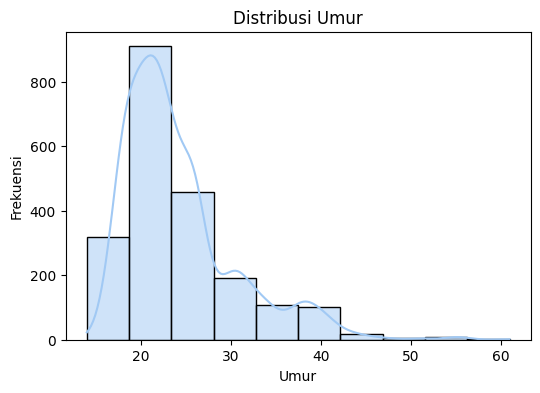

In [99]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', bins=10, kde=True)

plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

Dapat di lihat pada visualisasi diatas umur terbanyak pada dataset ini yaitu sekitar 20-30 tahun

In [100]:
df['obesity_level'].value_counts()

obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Dalam dataset ini terbagi menjadi 6 level obesitas yaitu:
1. Obesity Tipe I
2. Obesity Tipe II
3. Obesity Tipe III
4. Overweight Level I
5. Overweight Level II
6. Normal Weight
7. Insufficient Weight

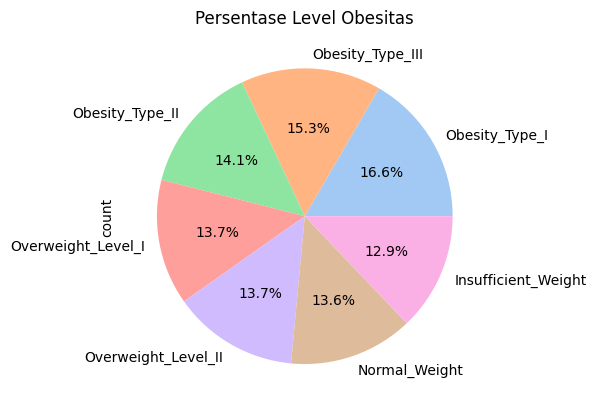

In [101]:
sns.set_palette('pastel')
df['obesity_level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentase Level Obesitas')
plt.show()

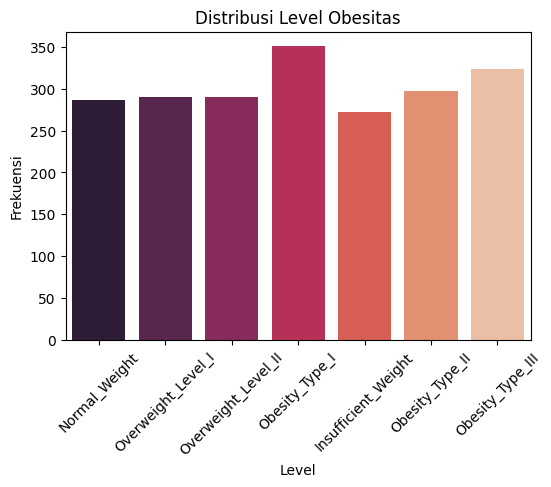

In [102]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='obesity_level', palette='rocket', hue='obesity_level')

plt.title('Distribusi Level Obesitas')
plt.xlabel('Level')
plt.xticks(rotation=45)
plt.ylabel('Frekuensi')
plt.show()

Dapat dilihat dari 2 visualisasi diatas persebaran level obesitas pada dataset ini cenderung seimbang.

## Clean Data | Membersihkan Data

In [103]:
# Cek Missing values
missing_values = df.isnull().sum()
missing_values

age                                 0
gender                              0
height                              0
weight                              0
often_drink_alcohol                 0
do_you_eat_high_caloric_food        0
amount_of_vegetable_in_meals        0
amount_of_daily_main_meals          0
do_you_monitor_calories_daily       0
smoke                               0
amount_of_drinking_water_daily      0
family_with_overweight              0
physical_activity                   0
time_used_for_technology_device     0
often_eat_any_food_between_meals    0
transportation_usually_use          0
obesity_level                       0
dtype: int64

In [104]:
# Cek data kosong (empty)
df.isna().sum()

age                                 0
gender                              0
height                              0
weight                              0
often_drink_alcohol                 0
do_you_eat_high_caloric_food        0
amount_of_vegetable_in_meals        0
amount_of_daily_main_meals          0
do_you_monitor_calories_daily       0
smoke                               0
amount_of_drinking_water_daily      0
family_with_overweight              0
physical_activity                   0
time_used_for_technology_device     0
often_eat_any_food_between_meals    0
transportation_usually_use          0
obesity_level                       0
dtype: int64

In [105]:
# Cek apakah terdapat duplikasi dalam data
df.duplicated().sum()

24

In [106]:
# Menghapus data yang duplikat
df.drop_duplicates(inplace=True)

In [107]:
# Dapat dilihat jumlah baris dalam dataset berkurang
print(f'The Number of rows: {df.shape[0]}')
print(f'The Number of columns / features: {df.shape[1]}')

The Number of rows: 2087
The Number of columns / features: 17


In [108]:
# Memilih semua kolom yang tipe datanya kategori
categorical_cols = df.select_dtypes(include=['object']).columns

# Cek value yang tipe datanya kategori
for col in categorical_cols:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
often_drink_alcohol: ['no' 'Sometimes' 'Frequently' 'Always']
do_you_eat_high_caloric_food: ['no' 'yes']
do_you_monitor_calories_daily: ['no' 'yes']
smoke: ['no' 'yes']
family_with_overweight: ['yes' 'no']
often_eat_any_food_between_meals: ['Sometimes' 'Frequently' 'Always' 'no']
transportation_usually_use: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
obesity_level: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [109]:
# Memanggil fungsi LabelEncoder yang sudah diimport
label_encoder = LabelEncoder()

# Encode label untuk kolom yang tipe data nya kategori
df['gender']= label_encoder.fit_transform(df['gender'])
df['often_drink_alcohol']= label_encoder.fit_transform(df['often_drink_alcohol'])
df['do_you_eat_high_caloric_food']= label_encoder.fit_transform(df['do_you_eat_high_caloric_food'])
df['do_you_monitor_calories_daily']= label_encoder.fit_transform(df['do_you_monitor_calories_daily'])
df['smoke']= label_encoder.fit_transform(df['smoke'])
df['family_with_overweight']= label_encoder.fit_transform(df['family_with_overweight'])
df['often_eat_any_food_between_meals']= label_encoder.fit_transform(df['often_eat_any_food_between_meals'])
df['transportation_usually_use']= label_encoder.fit_transform(df['transportation_usually_use'])
df['obesity_level']= label_encoder.fit_transform(df['obesity_level'])
df

,age,gender,height,weight,often_drink_alcohol,do_you_eat_high_caloric_food,amount_of_vegetable_in_meals,amount_of_daily_main_meals,do_you_monitor_calories_daily,smoke,amount_of_drinking_water_daily,family_with_overweight,physical_activity,time_used_for_technology_device,often_eat_any_food_between_meals,transportation_usually_use,obesity_level
0,21.000000,0,1.620000,64.000000,3,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,2,3,1
1,21.000000,0,1.520000,56.000000,2,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,2,3,1
2,23.000000,1,1.800000,77.000000,1,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,2,3,1
3,27.000000,1,1.800000,87.000000,1,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,2,4,5
4,22.000000,1,1.780000,89.800000,2,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,2,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,2,3,4
2107,21.982942,0,1.748584,133.742943,2,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,2,3,4
2108,22.524036,0,1.752206,133.689352,2,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,2,3,4
2109,24.361936,0,1.739450,133.346641,2,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,2,3,4


In [110]:
# Melihat korelasi / hubungan antar fitur
df.corr()

,age,gender,height,weight,often_drink_alcohol,do_you_eat_high_caloric_food,amount_of_vegetable_in_meals,amount_of_daily_main_meals,do_you_monitor_calories_daily,smoke,amount_of_drinking_water_daily,family_with_overweight,physical_activity,time_used_for_technology_device,often_eat_any_food_between_meals,transportation_usually_use,obesity_level
age,1.000000,0.050641,-0.031748,0.198160,-0.045565,0.063895,0.013572,-0.055823,-0.117959,0.091261,-0.044058,0.200379,-0.148202,-0.302927,0.092097,-0.601476,0.238308
gender,0.050641,1.000000,0.626748,0.163176,0.010574,0.061220,-0.271575,0.077863,-0.102435,0.045501,0.095129,0.113492,0.189471,0.022356,0.074564,-0.139044,0.014699
height,-0.031748,0.626748,1.000000,0.457468,-0.135756,0.180694,-0.040363,0.227806,-0.137078,0.054326,0.220487,0.232258,0.293584,0.041808,0.058001,-0.068258,0.038700
weight,0.198160,0.163176,0.457468,1.000000,-0.211351,0.274655,0.216574,0.092149,-0.205409,0.024369,0.203823,0.492969,-0.056490,-0.079351,0.300271,0.009836,0.388802
often_drink_alcohol,-0.045565,0.010574,-0.135756,-0.211351,1.000000,-0.087661,-0.063132,-0.082985,-0.004175,-0.083181,-0.085460,0.028403,0.086825,0.041830,-0.039502,-0.009828,-0.132821
do_you_eat_high_caloric_food,0.063895,0.061220,0.180694,0.274655,-0.087661,1.000000,-0.025419,-0.006398,-0.191277,-0.050713,0.002993,0.214329,-0.111184,0.071505,0.147921,-0.069422,0.041023
amount_of_vegetable_in_meals,0.013572,-0.271575,-0.040363,0.216574,-0.063132,-0.025419,1.000000,0.034885,0.071179,0.013716,0.081332,0.033199,0.022003,-0.104128,-0.038565,0.069012,0.025728
amount_of_daily_main_meals,-0.055823,0.077863,0.227806,0.092149,-0.082985,-0.006398,0.034885,1.000000,-0.020461,0.005009,0.075335,0.028411,0.127816,0.015693,-0.072316,-0.043648,-0.088235
do_you_monitor_calories_daily,-0.117959,-0.102435,-0.137078,-0.205409,-0.004175,-0.191277,0.071179,-0.020461,1.000000,0.047384,0.009325,-0.193947,0.073768,-0.012875,-0.109393,0.044381,-0.050936
smoke,0.091261,0.045501,0.054326,0.024369,-0.083181,-0.050713,0.013716,0.005009,0.047384,1.000000,-0.031642,0.014885,0.010811,0.016491,-0.054960,-0.009995,-0.023341


<Axes: >

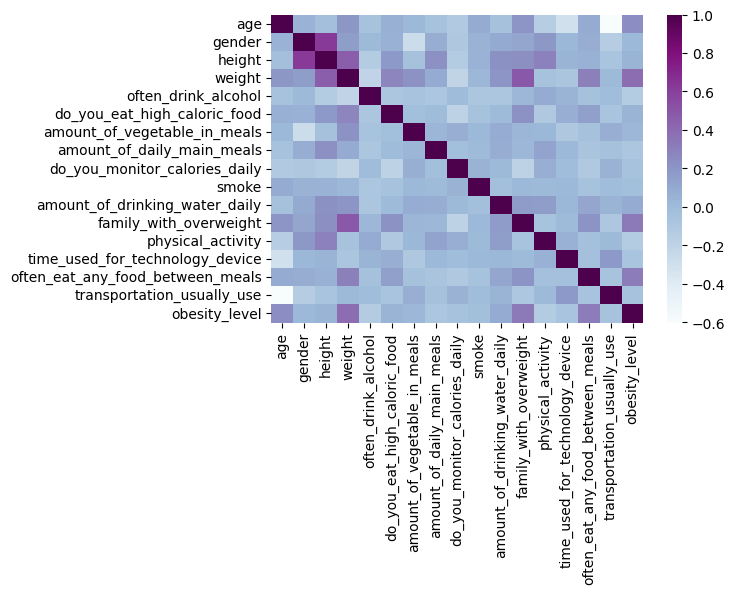

In [111]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), cmap='BuPu')

Dapat dilihat pada visualisasi heat map diatas, semakin gelap warna yang ditunjukkan fitur maka semakin kuat korelasinya terhadap obesitas.
Fitur-fitur tersebut adalah:
1. Weight
2. Gender
3. Family with overweight

# Model Training | Pelatihan Model

In [112]:
# Memisahkan variabel fitur dan target
X = df.drop(columns=['obesity_level'])
y = df['obesity_level']

print("X: ", X.shape)
print("y: ", y.shape)

X:  (2087, 16)
y:  (2087,)


In [113]:
# Normalisasi fitur-fitur dalam data
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(X)

In [114]:
# Split data menjadi 80 untuk training dan 20 untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [116]:
log_reg = LogisticRegression(solver='liblinear',C=200)
log_reg.fit(X_train, y_train)

LogisticRegression(C=200, solver='liblinear')

In [117]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [118]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [119]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Model Evaluation | Evaluasi Model

In [120]:
y_pred = svc.predict(X_test)
SVC_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM: {:.2f}%".format(SVC_acc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        59
           1       0.95      0.62      0.75        61
           2       0.88      0.96      0.92        70
           3       0.98      1.00      0.99        64
           4       1.00      1.00      1.00        60
           5       0.80      0.89      0.84        55
           6       0.88      0.78      0.83        49

    accuracy                           0.90       418
   macro avg       0.90      0.89      0.89       418
weighted avg       0.90      0.90      0.89       418

Akurasi SVM: 89.71%


In [121]:
y_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi Logistic Regression: {:.2f}%".format(log_reg_acc*100))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        59
           1       0.74      0.48      0.58        61
           2       0.69      0.73      0.71        70
           3       0.91      1.00      0.96        64
           4       1.00      1.00      1.00        60
           5       0.56      0.58      0.57        55
           6       0.52      0.61      0.56        49

    accuracy                           0.77       418
   macro avg       0.77      0.77      0.76       418
weighted avg       0.78      0.77      0.77       418

Akurasi Logistic Regression: 77.27%


In [122]:
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi KNN : {:.2f}%".format(knn_acc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        59
           1       0.84      0.52      0.65        61
           2       0.89      0.97      0.93        70
           3       1.00      0.98      0.99        64
           4       0.98      1.00      0.99        60
           5       0.78      0.85      0.82        55
           6       0.87      0.84      0.85        49

    accuracy                           0.89       418
   macro avg       0.88      0.88      0.88       418
weighted avg       0.89      0.89      0.88       418

Akurasi KNN : 88.52%


In [123]:
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi Random Forest : {:.2f}%".format(rf_acc*100))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.87      0.97      0.91        61
           2       1.00      0.97      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.98      0.91      0.94        55
           6       0.94      0.98      0.96        49

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418

Akurasi Random Forest : 96.65%


In [124]:
y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi Decision Tree : {:.2f}%".format(dt_acc*100))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        59
           1       0.82      0.74      0.78        61
           2       0.93      0.96      0.94        70
           3       1.00      0.97      0.98        64
           4       0.98      1.00      0.99        60
           5       0.81      0.85      0.83        55
           6       0.96      0.96      0.96        49

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418

Akurasi Decision Tree : 91.87%


## Model Selection | Pemilihan Model

In [125]:
Models_Scores = pd.DataFrame({'Models':['SVC','Logistic Regression','KNN','Random Forest','Decision Tree'],
             'Accuracy':[SVC_acc,log_reg_acc,knn_acc,rf_acc,dt_acc],
             })
Models_Scores.head()

,Models,Accuracy
0,SVC,0.897129
1,Logistic Regression,0.772727
2,KNN,0.885167
3,Random Forest,0.966507
4,Decision Tree,0.918660


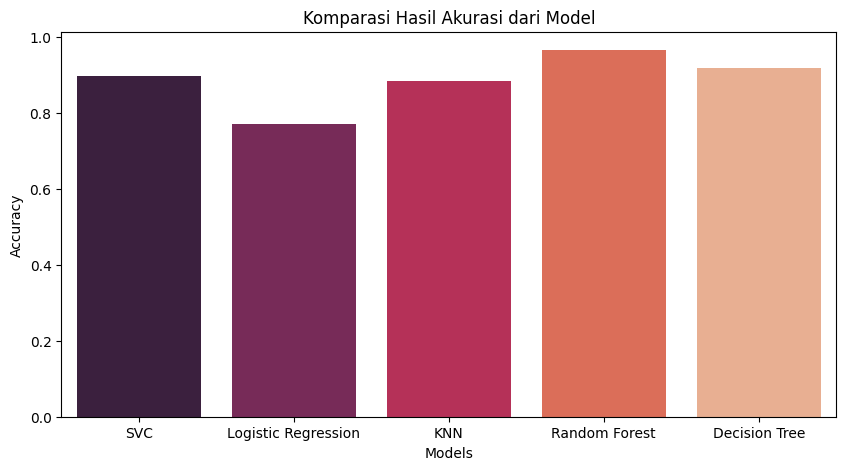

In [126]:
plt.figure(figsize=(10,5))
plt.title('Komparasi Hasil Akurasi dari Model')
figure = sns.barplot(x = Models_Scores['Models'],y = Models_Scores['Accuracy'], palette='rocket', width=0.8, hue=Models_Scores['Models'])

## Conclusion | Kesimpulan

Dari hasil akurasi model, dapat disimpulkan yaitu:

1. Random Forest memiliki akurasi tertinggi dengan skor sekitar 96.65%. Hal ini menunjukkan bahwa model Random Forest sangat efektif dalam melakukan klasifikasi tingkat obesitas berdasarkan fitur-fitur yang diberikan.

2. Decision Tree juga memiliki kinerja yang baik dengan akurasi sekitar 91.87%, meskipun sedikit lebih rendah daripada Random Forest. Meskipun demikian, Decision Tree masih memberikan hasil yang dapat diandalkan dalam klasifikasi obesitas.

3. Support Vector Machine (SVC) dan K-Nearest Neighbors (KNN) menunjukkan performa yang cukup baik dengan akurasi masing-masing sekitar 89.71% dan 88.52%. Meskipun tidak setinggi Random Forest dan Decision Tree, keduanya masih memberikan hasil yang layak untuk klasifikasi obesitas.

4. Logistic Regression memiliki akurasi yang paling rendah di antara semua model, dengan skor sekitar 77.27%. Meskipun demikian, ini tidak berarti bahwa Logistic Regression tidak bermanfaat; mungkin ada faktor-faktor tertentu dalam data yang tidak sesuai dengan asumsi linieritas Logistic Regression.

Maka Random Forest dan Decision Tree adalah model-model yang paling efektif dalam melakukan klasifikasi tingkat obesitas berdasarkan fitur-fitur yang diberikan, diikuti oleh SVM dan KNN. Logistic Regression, meskipun memiliki akurasi yang lebih rendah, masih dapat memberikan wawasan tambahan yang berguna dalam analisis.